In [3]:
import numpy as np
import pandas as pd
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import mdn, Mixture, NLLLoss
from tortreinador.utils.View import init_weights, split_weights
import torch
import torch.nn as nn
from tortreinador.utils.metrics import r2_score
import math
from sklearn.preprocessing import MinMaxScaler
import proplot as pplt
import matplotlib
import matplotlib.pyplot as plt
import joblib

In [2]:
df_chunk_0 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_0.parquet")
df_chunk_1 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_1.parquet")

df_all = pd.concat([df_chunk_0, df_chunk_1])

In [7]:
input_parameters = [
    'Mass', 
    'Radius',
    'FeMg',
    'SiMg',
]


output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF', 
    'CPS',
    'CTP',
    'k2'
]

In [4]:
t_loader, v_loader, t_x, t_y, m_x, m_y = load_data(df_all, input_parameters, output_parameters, batch_size=1024)

In [5]:
trainer = TorchTrainer(epoch=200)

Batch size: 512, Epoch:200, is GPU: True


In [6]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
criterion = NLLLoss()
pdf = Mixture()
optim = torch.optim.Adam(split_weights(model), lr=0.0001, weight_decay=0.001)

In [7]:
t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\rockyExoplanetV3\\', optim=optim, best_r2=0.8, warmup_epoch=5, lr_milestones=[30, 50, 105, 130, 140, 150], gamma=0.7)

module.root_layer.0.weight : torch.Size([512, 4])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([20, 512])
module.pi.2.bias : torch.Size([20])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([160, 512])
module.mu.2.bias : torch.Size([160])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([160, 512])
module.sigma.2.bias : torch.Size([160])


  0%|          | 0/2757 [00:00<?, ?batch/s]E:\anaconda\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 6 Validating: 100%|██████████| 345/345 [00:08<00:00, 38.48batch/s, loss=-28.6023, loss_avg=-28.4361, mse=0.0093, r2=0.8338]


Save Best model: R2:0.8338, Loss Avg:-28.4361


Epoch 7 Validating: 100%|██████████| 345/345 [00:09<00:00, 38.23batch/s, loss=-30.5288, loss_avg=-30.1523, mse=0.0048, r2=0.8989]


Save Best model: R2:0.8989, Loss Avg:-30.1523


Epoch 9 Validating: 100%|██████████| 345/345 [00:08<00:00, 40.18batch/s, loss=-31.7757, loss_avg=-31.5569, mse=0.0040, r2=0.9111]


Save Best model: R2:0.9111, Loss Avg:-31.5569


Epoch 12 Validating: 100%|██████████| 345/345 [00:08<00:00, 39.43batch/s, loss=-33.1590, loss_avg=-32.9108, mse=0.0037, r2=0.9151]


Save Best model: R2:0.9151, Loss Avg:-32.9108


Epoch 14 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.13batch/s, loss=-31.0185, loss_avg=-30.8716, mse=0.0034, r2=0.9208]


Save Best model: R2:0.9208, Loss Avg:-30.8716


Epoch 15 Validating: 100%|██████████| 345/345 [00:09<00:00, 37.95batch/s, loss=-33.3344, loss_avg=-33.0080, mse=0.0026, r2=0.9256]


Save Best model: R2:0.9256, Loss Avg:-33.0080


Epoch 17 Validating: 100%|██████████| 345/345 [00:08<00:00, 39.24batch/s, loss=-31.1466, loss_avg=-30.9508, mse=0.0043, r2=0.9261]


Save Best model: R2:0.9261, Loss Avg:-30.9508


Epoch 18 Validating: 100%|██████████| 345/345 [00:09<00:00, 37.66batch/s, loss=-34.5609, loss_avg=-34.3611, mse=0.0021, r2=0.9324]


Save Best model: R2:0.9324, Loss Avg:-34.3611


Epoch 19 Validating: 100%|██████████| 345/345 [00:08<00:00, 38.96batch/s, loss=-34.9888, loss_avg=-34.7166, mse=0.0023, r2=0.9356]


Save Best model: R2:0.9356, Loss Avg:-34.7166


Epoch 22 Validating: 100%|██████████| 345/345 [00:08<00:00, 38.62batch/s, loss=-35.3941, loss_avg=-35.1973, mse=0.0025, r2=0.9374]


Save Best model: R2:0.9374, Loss Avg:-35.1973


Epoch 23 Validating: 100%|██████████| 345/345 [00:08<00:00, 39.62batch/s, loss=-34.3058, loss_avg=-34.1845, mse=0.0023, r2=0.9426]


Save Best model: R2:0.9426, Loss Avg:-34.1845


Epoch 24 Validating: 100%|██████████| 345/345 [00:08<00:00, 40.26batch/s, loss=-36.4622, loss_avg=-36.2347, mse=0.0024, r2=0.9448]


Save Best model: R2:0.9448, Loss Avg:-36.2347


Epoch 29 Validating: 100%|██████████| 345/345 [00:07<00:00, 45.30batch/s, loss=-36.0607, loss_avg=-35.8473, mse=0.0023, r2=0.9481]


Save Best model: R2:0.9481, Loss Avg:-35.8473


Epoch 32 Validating: 100%|██████████| 345/345 [00:07<00:00, 46.10batch/s, loss=-36.9343, loss_avg=-36.7192, mse=0.0021, r2=0.9483]


Save Best model: R2:0.9483, Loss Avg:-36.7192


Epoch 33 Validating: 100%|██████████| 345/345 [00:07<00:00, 46.81batch/s, loss=-37.9148, loss_avg=-37.6443, mse=0.0018, r2=0.9517]


Save Best model: R2:0.9517, Loss Avg:-37.6443


Epoch 36 Validating: 100%|██████████| 345/345 [00:07<00:00, 45.76batch/s, loss=-39.4145, loss_avg=-39.0347, mse=0.0015, r2=0.9523]


Save Best model: R2:0.9523, Loss Avg:-39.0347


Epoch 39 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.70batch/s, loss=-34.0125, loss_avg=-33.9638, mse=0.0015, r2=0.9534]


Save Best model: R2:0.9534, Loss Avg:-33.9638


Epoch 43 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.58batch/s, loss=-40.0868, loss_avg=-39.9055, mse=0.0017, r2=0.9549]


Save Best model: R2:0.9549, Loss Avg:-39.9055


Epoch 44 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.63batch/s, loss=-40.2932, loss_avg=-40.2234, mse=0.0016, r2=0.9550]


Save Best model: R2:0.9550, Loss Avg:-40.2234


Epoch 46 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.94batch/s, loss=-39.2246, loss_avg=-38.9821, mse=0.0017, r2=0.9554]


Save Best model: R2:0.9554, Loss Avg:-38.9821


Epoch 49 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.88batch/s, loss=-36.1128, loss_avg=-35.9080, mse=0.0015, r2=0.9554]


Save Best model: R2:0.9554, Loss Avg:-35.9080


Epoch 50 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.37batch/s, loss=-41.0076, loss_avg=-40.7364, mse=0.0014, r2=0.9563]


Save Best model: R2:0.9563, Loss Avg:-40.7364


Epoch 52 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.78batch/s, loss=-40.0642, loss_avg=-39.7939, mse=0.0017, r2=0.9566]


Save Best model: R2:0.9566, Loss Avg:-39.7939


Epoch 56 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.52batch/s, loss=-38.6273, loss_avg=-38.4466, mse=0.0015, r2=0.9569]


Save Best model: R2:0.9569, Loss Avg:-38.4466


Epoch 57 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.94batch/s, loss=-41.8684, loss_avg=-41.6524, mse=0.0015, r2=0.9576]


Save Best model: R2:0.9576, Loss Avg:-41.6524


Epoch 58 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.72batch/s, loss=-42.0974, loss_avg=-41.8611, mse=0.0019, r2=0.9576]


Save Best model: R2:0.9576, Loss Avg:-41.8611


Epoch 62 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.11batch/s, loss=-39.3464, loss_avg=-39.1708, mse=0.0020, r2=0.9577]


Save Best model: R2:0.9577, Loss Avg:-39.1708


Epoch 63 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.89batch/s, loss=-42.2799, loss_avg=-42.1354, mse=0.0017, r2=0.9579]


Save Best model: R2:0.9579, Loss Avg:-42.1354


Epoch 65 Validating: 100%|██████████| 345/345 [00:07<00:00, 49.25batch/s, loss=-42.3349, loss_avg=-42.1053, mse=0.0016, r2=0.9580]


Save Best model: R2:0.9580, Loss Avg:-42.1053


Epoch 66 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.37batch/s, loss=-41.2657, loss_avg=-41.0939, mse=0.0017, r2=0.9583]


Save Best model: R2:0.9583, Loss Avg:-41.0939


Epoch 69 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.86batch/s, loss=-40.2738, loss_avg=-40.1540, mse=0.0015, r2=0.9584]


Save Best model: R2:0.9584, Loss Avg:-40.1540


Epoch 70 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.38batch/s, loss=-42.7310, loss_avg=-42.4606, mse=0.0015, r2=0.9586]


Save Best model: R2:0.9586, Loss Avg:-42.4606


Epoch 71 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.82batch/s, loss=-42.6913, loss_avg=-42.4699, mse=0.0013, r2=0.9592]


Save Best model: R2:0.9592, Loss Avg:-42.4699


Epoch 81 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.12batch/s, loss=-38.9022, loss_avg=-38.8606, mse=0.0013, r2=0.9592]


Save Best model: R2:0.9592, Loss Avg:-38.8606


Epoch 83 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.04batch/s, loss=-41.8645, loss_avg=-41.7464, mse=0.0015, r2=0.9594]


Save Best model: R2:0.9594, Loss Avg:-41.7464


Epoch 84 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.78batch/s, loss=-41.2878, loss_avg=-41.1067, mse=0.0012, r2=0.9594]


Save Best model: R2:0.9594, Loss Avg:-41.1067


Epoch 85 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.48batch/s, loss=-39.6837, loss_avg=-39.6602, mse=0.0012, r2=0.9595]


Save Best model: R2:0.9595, Loss Avg:-39.6602


Epoch 87 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.30batch/s, loss=-41.9941, loss_avg=-41.8563, mse=0.0014, r2=0.9598]


Save Best model: R2:0.9598, Loss Avg:-41.8563


Epoch 90 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.91batch/s, loss=-42.8655, loss_avg=-42.7749, mse=0.0014, r2=0.9598]


Save Best model: R2:0.9598, Loss Avg:-42.7749


Epoch 91 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.31batch/s, loss=-43.2503, loss_avg=-43.0332, mse=0.0014, r2=0.9598]


Save Best model: R2:0.9598, Loss Avg:-43.0332


Epoch 93 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.44batch/s, loss=-42.9785, loss_avg=-42.8012, mse=0.0014, r2=0.9599]


Save Best model: R2:0.9599, Loss Avg:-42.8012


Epoch 97 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.53batch/s, loss=-41.9450, loss_avg=-41.8100, mse=0.0014, r2=0.9604]


Save Best model: R2:0.9604, Loss Avg:-41.8100


Epoch 101 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.52batch/s, loss=-43.2848, loss_avg=-43.0544, mse=0.0012, r2=0.9610]


Save Best model: R2:0.9610, Loss Avg:-43.0544


Epoch 108 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.72batch/s, loss=-43.0358, loss_avg=-42.8081, mse=0.0014, r2=0.9615]


Save Best model: R2:0.9615, Loss Avg:-42.8081


Epoch 151 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.60batch/s, loss=-44.4627, loss_avg=-44.1515, mse=0.0016, r2=0.9615]


Save Best model: R2:0.9615, Loss Avg:-44.1515


Epoch 170 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.80batch/s, loss=-44.9553, loss_avg=-44.6793, mse=0.0012, r2=0.9616]


Save Best model: R2:0.9616, Loss Avg:-44.6793


Epoch 174 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.80batch/s, loss=-44.9740, loss_avg=-44.7120, mse=0.0014, r2=0.9617]


Save Best model: R2:0.9617, Loss Avg:-44.7120


Epoch 187 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.94batch/s, loss=-45.2018, loss_avg=-44.8857, mse=0.0011, r2=0.9617]


Save Best model: R2:0.9617, Loss Avg:-44.8857


Epoch 189 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.79batch/s, loss=-45.0260, loss_avg=-44.7430, mse=0.0015, r2=0.9618]


Save Best model: R2:0.9618, Loss Avg:-44.7430


Epoch 196 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.41batch/s, loss=-45.2148, loss_avg=-44.8916, mse=0.0012, r2=0.9618]


Save Best model: R2:0.9618, Loss Avg:-44.8916


Epoch 200 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.03batch/s, loss=-45.1331, loss_avg=-44.8660, mse=0.0012, r2=0.9618]


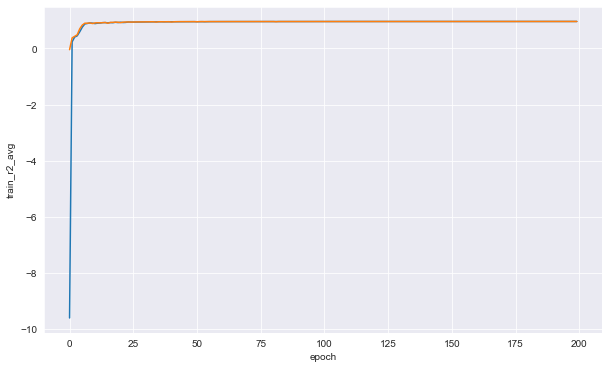

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\ROCKYEXO_MDN20240116_TrainValR2_2.png", dpi=300)

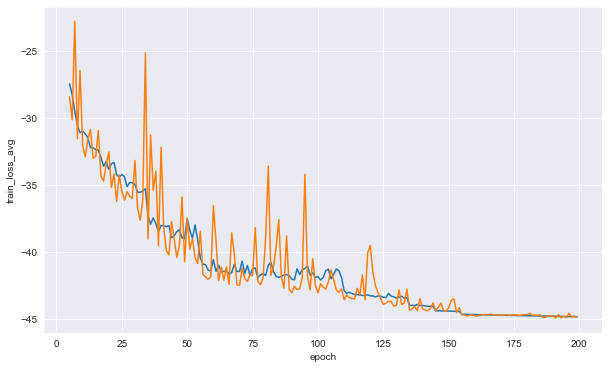

In [9]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd.iloc[5:, :], output_path=".\\imgs\\ROCKYEXO_MDN20240116_TrainValLoss_2.png")

In [10]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())

In [11]:
loss_dis_df = pd.DataFrame(np.array(t_l) - np.array(v_l)).iloc[25:, :]

In [12]:
max_dis_10 = loss_dis_df.sort_values(by=0, ascending=False).iloc[:10, :].sort_index()

In [14]:
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_x.npy', t_x)
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_y.npy', t_y)
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\scaler_x.npy', m_x)
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\scaler_y.npy', m_y)

In [15]:
joblib.dump(m_x, "D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_Xscaler_20231201.save")
joblib.dump(m_y, "D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save")

['D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save']

In [5]:
t_x = np.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_x.npy")
t_y = np.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_y.npy")
m_y = joblib.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save")


In [9]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
model = nn.DataParallel(model)
model.to("cuda")
model.load_state_dict(torch.load("D:\\Resource\\MDN\\rockyExoplanetV3\\best_model.pth"))

<All keys matched successfully>

In [10]:
model.eval()
# Predict
pi, mu, sigma = model(torch.from_numpy(t_x))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, torch.from_numpy(t_y).to('cuda')),
                                            mse(torch.from_numpy(t_y).to('cuda'), sample),
                                            r2_score(sample, torch.from_numpy(t_y).to('cuda'))))

NLLLoss: -44.89113384369246, MSE: 0.0012634989519551383, R2: 0.9617143194698663


In [11]:
pi_exp = torch.exp(pi)
mu_np = mu.detach().cpu().numpy()
sigma_np = sigma.detach().cpu().numpy()
pi_np = pi_exp.detach().cpu().numpy()

y_label = np.arange(0,1,0.001).reshape(-1,1)
y_label_ = y_label[:, np.newaxis, np.newaxis, :]

In [12]:
idx_select = np.random.choice(range(0, len(mu_np)), 20000)
mu_sub = mu_np[idx_select]
sigma_sub = sigma_np[idx_select]
pi_sub = pi_np[idx_select]

In [13]:
mu_sub_T = np.transpose(mu_sub, (0, 2, 1))
sigma_sub_T = np.transpose(sigma_sub, (0, 2, 1))

# shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
exponent = np.exp(-1/2*np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3))/sigma_sub_T[:, :, np.newaxis, :]))
factors = 1 / math.sqrt(2*math.pi) / sigma_sub_T[:, :, np.newaxis, :]
GMM_PDF = np.sum(pi_sub[:, np.newaxis, np.newaxis, :]*factors*exponent, axis=-1)
MM = MinMaxScaler()
GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
# f = e.transpose((-1, 0))
GMM_PDF_scaled = MM.fit_transform(GMM_PDF)

In [15]:
# t_y = t_y.detach().cpu().numpy()
test_y_inverse = m_y.inverse_transform(t_y)
test_y_inverse_sub = test_y_inverse[idx_select]

Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).


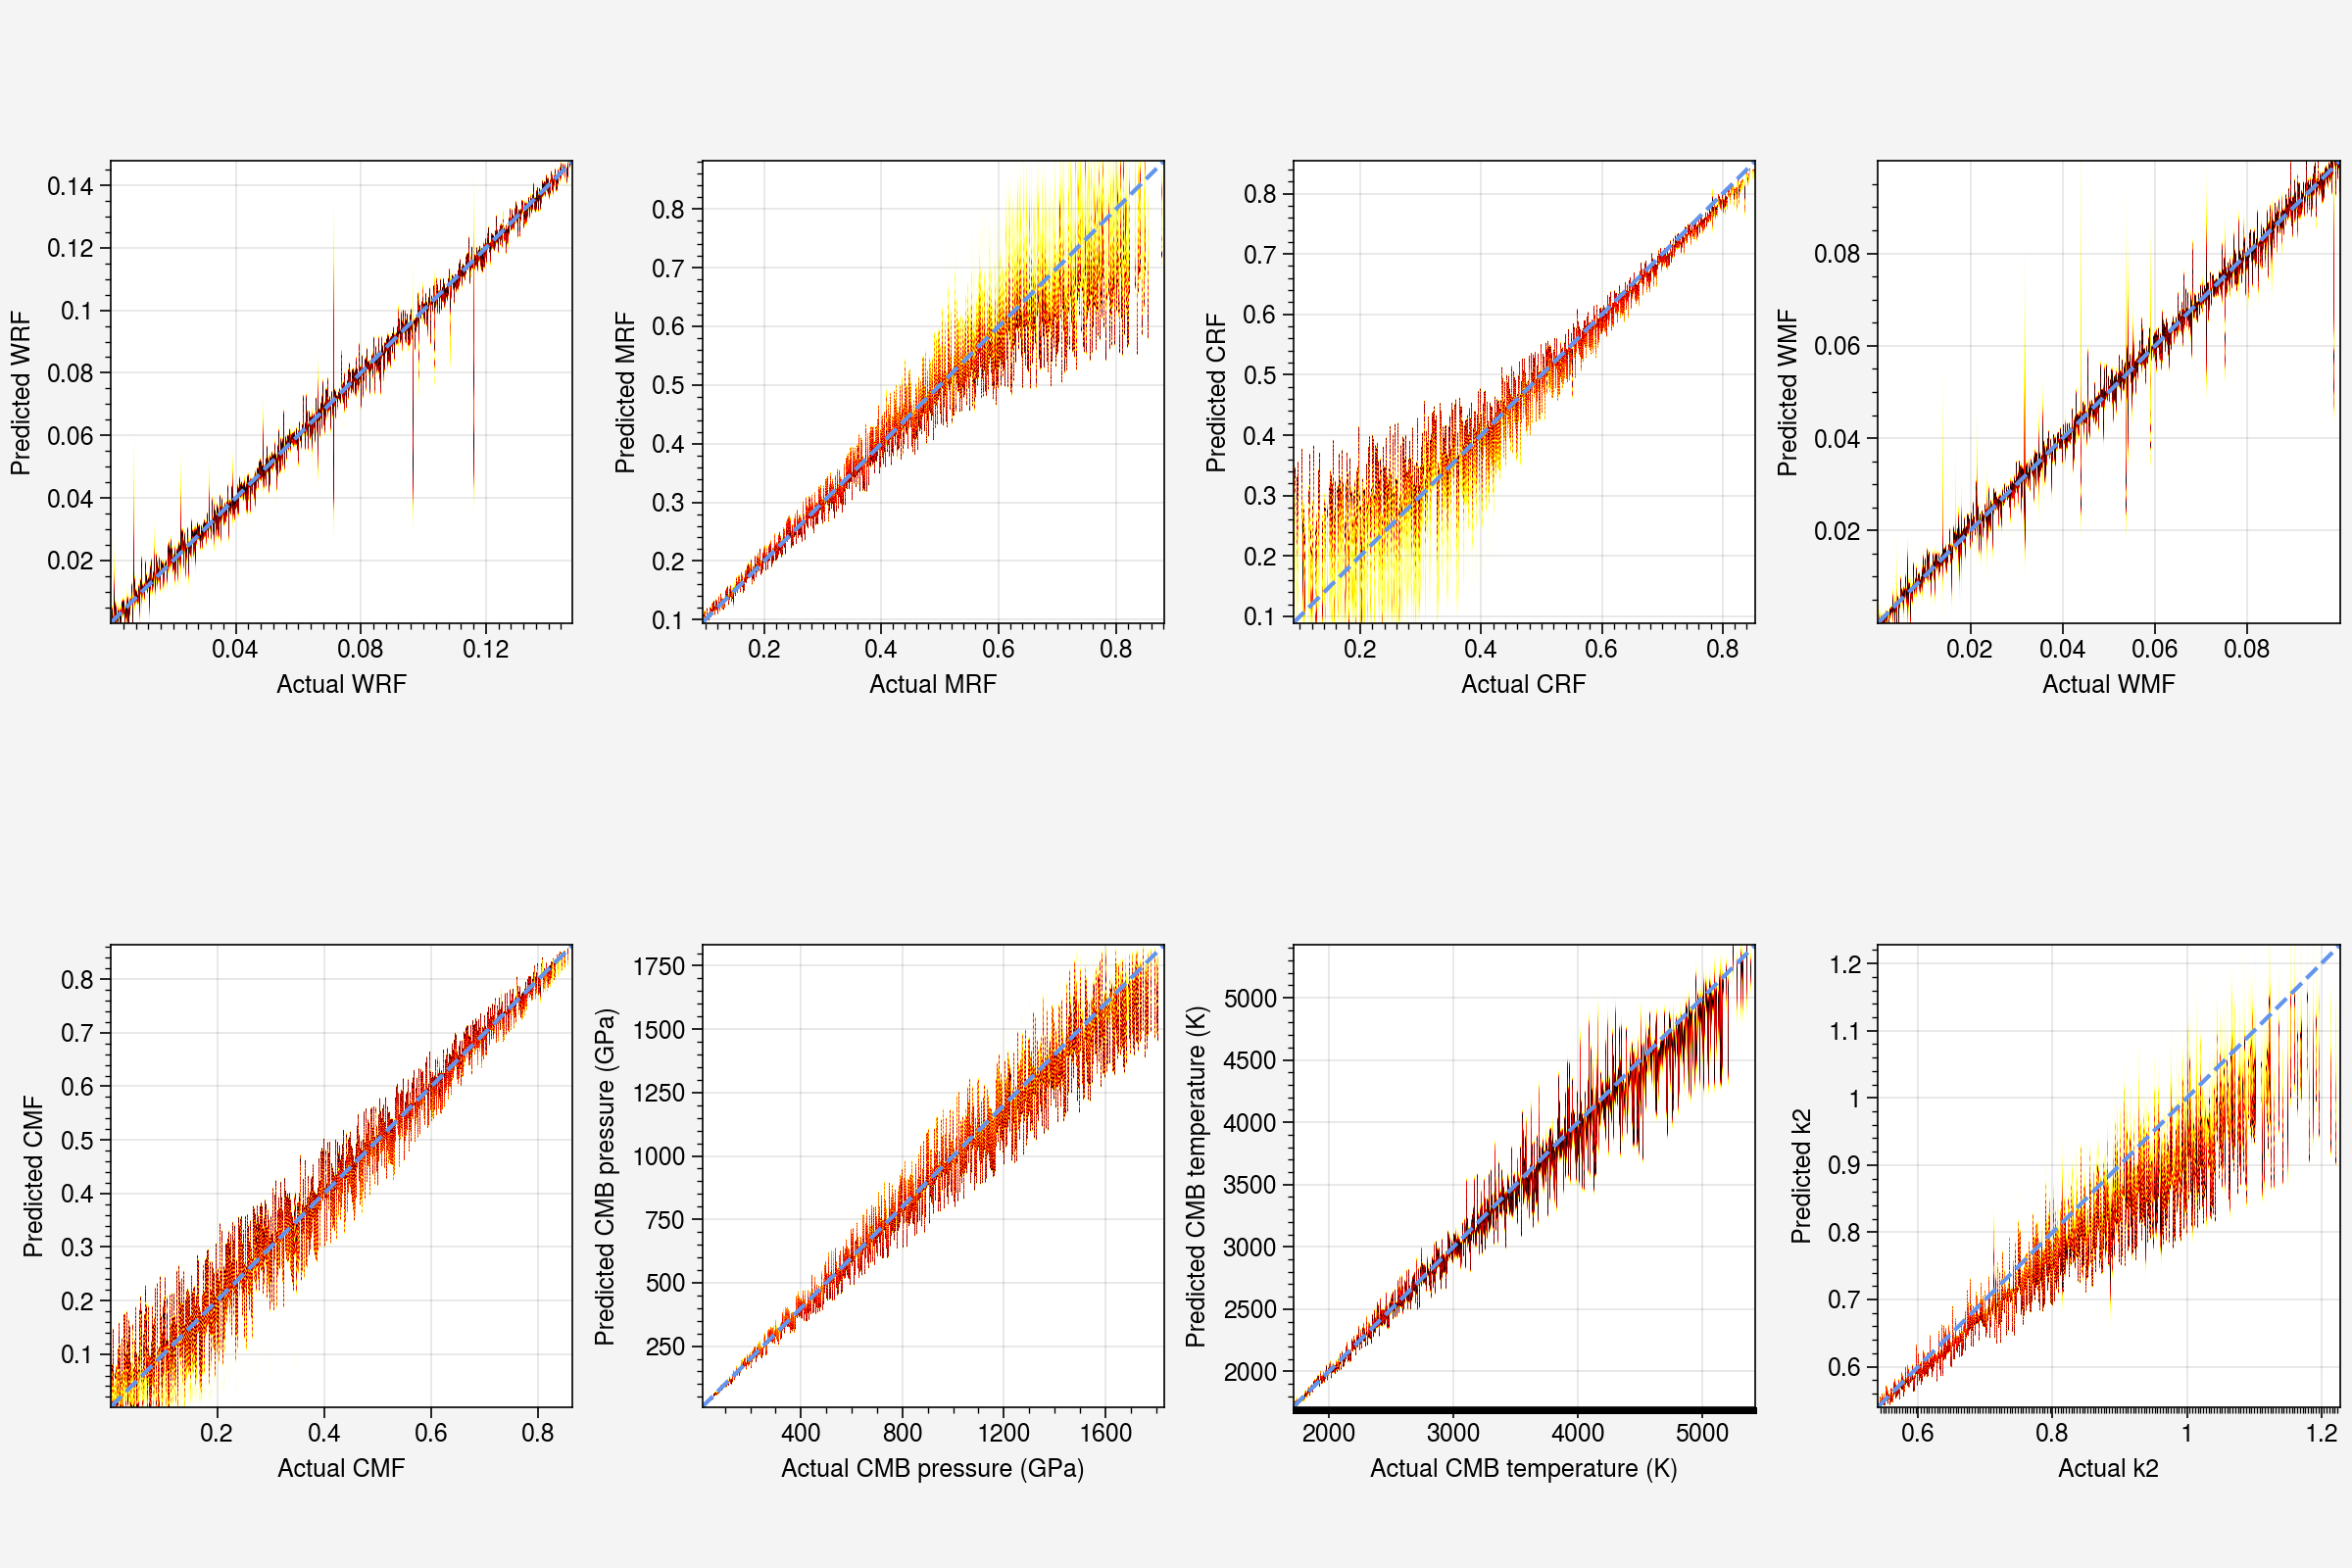

In [17]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=4,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF', 
    'CPS',
    'CTP',
    'k2'
]


xlabels = [
    "Actual WRF","Actual MRF", "Actual CRF", 
    "Actual WMF","Actual CMF", "Actual CMB pressure (GPa)", "Actual CMB temperature (K)",
    "Actual k2", 
]
ylabels = [
    "Predicted WRF","Predicted MRF", "Predicted CRF", 
    "Predicted WMF","Predicted CMF", "Predicted CMB pressure (GPa)", "Predicted CMB temperature (K)",
    "Predicted k2", 
]

xlocators = [
    0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse_sub[:, o])
    y_min = min(test_y_inverse_sub[:, o])
    for i in range(0, GMM_PDF_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse_sub[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_PDF_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max),
        xlabel=xlabels[o], ylabel=ylabels[o],
        xlocator=xlocators[o], xminorlocator=xminorlocators[o],
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )

In [18]:
fig.save('D:\\PythonProject\\RebuildProject\\Rock\\imgs\\prediction_ROCKYV3_20240117.png')

Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92693 ticks ([1714.72, ..., 5422.400000000001]), which exceeds Locator.MAXTICKS (1000).
